In [1]:
from importlib import reload
import flymovie as fm
from flymovie.simnuc import Sim
import matplotlib.pyplot as plt
import numpy as np
import os
import random
import pickle
from pathlib import Path
import scipy.ndimage as ndi
from importlib import reload
%load_ext autoreload
%autoreload 2

In [21]:
# Get some nuclear masks.
im = fm.read_czi('/Users/michaelstadler/Bioinformatics/Projects/rpb1/data/counting_blobs/cycle 13/embryo 12.czi', swapaxes=False)
sm = ndi.gaussian_filter(im, 2)
mask = np.where(sm > 12, 1, 0)
mask = ndi.morphology.binary_opening(mask,np.ones((1,7,7)))
lmask,_ = ndi.label(mask)
#fm.viewer(lmask, 5)
masks = Sim.extract_nuclear_masks(lmask)

fm.save_pickle(masks, '/Users/michaelstadler/Bioinformatics/Projects/rpb1/results/real_nuclear_masks_nc13.pkl')

In [11]:
?sim.add_nblobs

Signature:
sim.add_nblobs(
    numblobs,
    intensity_mean,
    intensity_std,
    sigma_base,
    sigma_k=0.5,
    sigma_theta=0.5,
)
Docstring:
Add gaussian blobs at random positions inside nucleus, with
intensities and widths drawn from random distributions.

Intensities are drawn from gaussian distribution, widths (sigma of
gaussian) use a gamma distribution (gamma is non-negative): 
    sigma = sigma_base + gamma(k, theta)

Args:
    numblobs: int, number of blobs to add
    intensity_mean: numeric, mean of the distribution from which 
        blob intensities are drawn.
    intensity_std: numeric, std. deviation of the distribution from
        which blob intensities are drawn.
    sigma_base: numeric, minimum value of gaussian width (sigma)
    sigma_k: numeric, shape parameter of gamma distribution added to 
        sigma_base to determine gaussian width
    sigma_theta: numeric, scale parameter of gamma distribution added 
        to sigma_base to determine gaussian width
Fil

In [39]:
mask = Sim.make_dummy_mask()
sim = Sim(mask)
sim.add_background(val=10_000)
sim.add_background(val=1500, inverse=True)
sim.smooth_edges(sigma=1.5)
sim.add_hlb(24_000, 4.5, p=3)
sim.add_nblobs(300, 7_000, 4_500, 1.5, 0.5, 0.5)
sim.add_noise(sigma=2000)
fm.viewer(sim.im, 4, color='viridis')

interactive(children=(Dropdown(description='Color', index=10, options=('magma', 'gray_r', 'inferno', 'cividis'…

In [63]:
# Do a batch of sims.
fm.simnuc.sim_rpb1_rand_batch(
    maskfile = '/Users/michaelstadler/Bioinformatics/Projects/rpb1/results/real_nuclear_masks_nc13.pkl',
    outfolder = '/Users/michaelstadler/Bioinformatics/Projects/rpb1/results/simstemp',
    nsims=500,
    nreps=4,
    nprocesses=4,
    nuc_bg_mean_rng=[8_000, 10_000], 
    nonnuc_bg_mean_rng=[800,1200], 
    noise_sigma_rng=[200,400], 
    nblobs_rng=[0,100], 
    blob_intensity_mean_rng=[8_000, 12_000], 
    blob_intensity_std_rng=[1_000, 3_000],
    blob_sigma_base_rng=[0.5,0.5],
    blob_sigma_k_rng=[0.5,0.5], 
    blob_sigma_theta_rng=[0.5,0.5], 
    hlb_intensity_rng=[15_000, 25_000],
    hlb_sigma_rng=[4,6], 
    hlb_p_rng=[1.7,2.3])

arglist done


In [59]:
mask = masks[0]
nuc_bg_mean = 40 * 256
nonnuc_bg_mean = 1_250
hlb_intensity = 38_500
hlb_sigma = 5
hlb_p = 2.5
nblobs = 200
blob_intensity_mean = 5_000
blob_intensity_std = 2_000
blob_sigma_base = 0.2
blob_sigma_k = 0.5
blob_sigma_theta = 1
noise_sigma = 625

l = []

for _ in range(6):
    mask = masks[np.random.randint(0,len(masks))]
    mask = np.pad(mask, [(0,0), (8,8), (8,8)])
    sim = Sim(mask)
    sim.add_background(val=nuc_bg_mean)
    sim.add_background(inverse=True, val=nonnuc_bg_mean)
    sim.smooth_edges(2.5)
    sim.im = np.where(mask, sim.im, nonnuc_bg_mean)
    sim.smooth_edges(1)
    sim.add_hlb(hlb_intensity, hlb_sigma, hlb_p)
    sim.add_nblobs(nblobs, blob_intensity_mean, blob_intensity_std, 
        sigma_base=blob_sigma_base, sigma_k=blob_sigma_k, 
        sigma_theta=blob_sigma_theta)
    sim.add_noise(sigma=noise_sigma)
    #sim.im = np.pad(sim.im, [(0,0), (8,8), (8,8)])
    l.append(sim.im.max(axis=0))

fm.viewer(l, 3)

interactive(children=(Dropdown(description='Color', index=2, options=('gray_r', 'Reds', 'cividis', 'plasma', '…

In [41]:
im = fm.read_czi('/Users/michaelstadler/Bioinformatics/Projects/rpb1/data/counting_blobs/cycle 12/embryo3.czi', swapaxes=False)
fm.viewer(im.max(axis=0) * 256)

interactive(children=(Dropdown(description='Color', index=2, options=('gray_r', 'Reds', 'cividis', 'plasma', '…

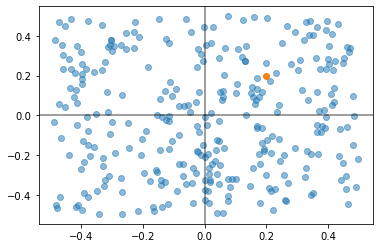

In [38]:
a = np.zeros((300,2))
for c in range(a.shape[1]):
    a[:,c] = np.random.random(size=a.shape[0]) - 0.5

plt.scatter(a[:,0], a[:,1], alpha=0.5)
plt.axhline(y=0, color='k', alpha=0.5)
plt.axvline(x=0, color='k', alpha=0.5)
plt.scatter(0.2,0.2)

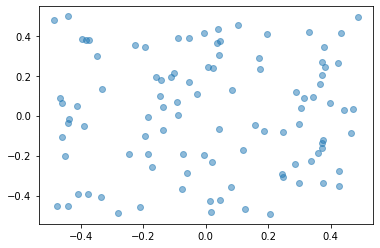